<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Assignment: Exploring and Preparing Data


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab


In [1]:
!pip install numpy pandas seaborn
!pip install requests

In [2]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [2]:
import requests
import pandas as pd
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
response = requests.get(URL)
dataset_part_2_csv = io.StringIO(response.text)
df = pd.read_csv(dataset_part_2_csv)
df.head(5)


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


c:\Users\Santi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


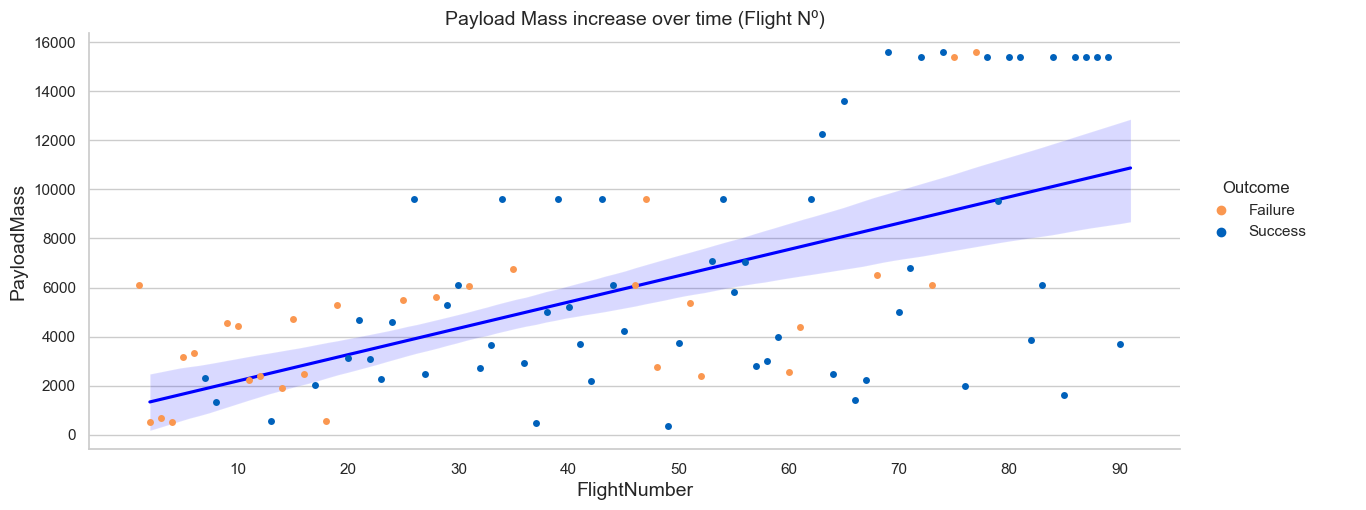

In [21]:
# Create a new DataFrame with the mapped values
df_mapped = df.copy()
df_mapped['Class'] = df_mapped['Class'].map({0: 'Failure', 1: 'Success'})

# Define a custom palette
custom_palette = {'Failure': '#FA9750', 'Success': '#0061BB'}

# Create the catplot with the desired aspect ratio and figure size
g = sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df_mapped, aspect=5, palette=custom_palette)
g.fig.set_size_inches(12, 5)

# Set the labels
g.set_axis_labels("Flight Number", "Payload Mass (kg)", fontsize=14)

# Move the legend away from the plot
g._legend.set_bbox_to_anchor((1.1, 0.6))
g._legend.set_title("Outcome")

# Set the x-axis ticks with a step of 10
plt.xticks(ticks=range(-1, 90, 10))

# Add a title to the plot
plt.title("Payload Mass increase over time (Flight Nº)", fontsize=14)

# Overlay a trend line using regplot
sns.regplot(y="PayloadMass", x="FlightNumber", data=df_mapped, scatter=False, color="blue")

# Show the plot
plt.show()

We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.


Next, let's drill down to each site visualize its detailed launch records.


Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


c:\Users\Santi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


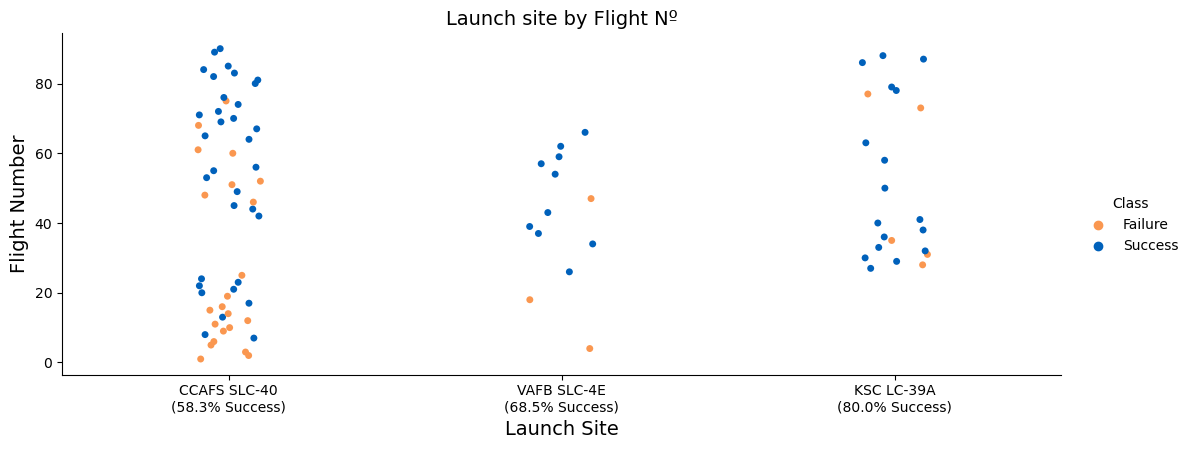

In [7]:
# Visualize the relationship between Flight Number and Launch Site
g = sns.catplot(y="FlightNumber", x="LaunchSite", hue="Class", data=df_mapped, aspect=2, palette=custom_palette)
g.fig.set_size_inches(12, 4)

# Set the labels
plt.ylabel("Flight Number", fontsize=14)
plt.xlabel("Launch Site", fontsize=14)

# Customize the x-axis tick labels
new_labels = ['CCAFS SLC-40\n(58.3% Success)', 'VAFB SLC-4E\n(68.5% Success)', 'KSC LC-39A\n(80.0% Success)']
g.set_xticklabels(new_labels)

# Add a title to the plot
plt.title("Launch site by Flight Nº", fontsize=14)

# Show the plot
plt.show()

We can see that the launch sites with the most number of launches aren't necessary the ones with the highest landing success. Also we can see that the first flights weren't very successfull, and the success rate started increasing together with the flight number.

We also want to observe if there is any relationship between launch sites and their payload mass.


c:\Users\Santi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


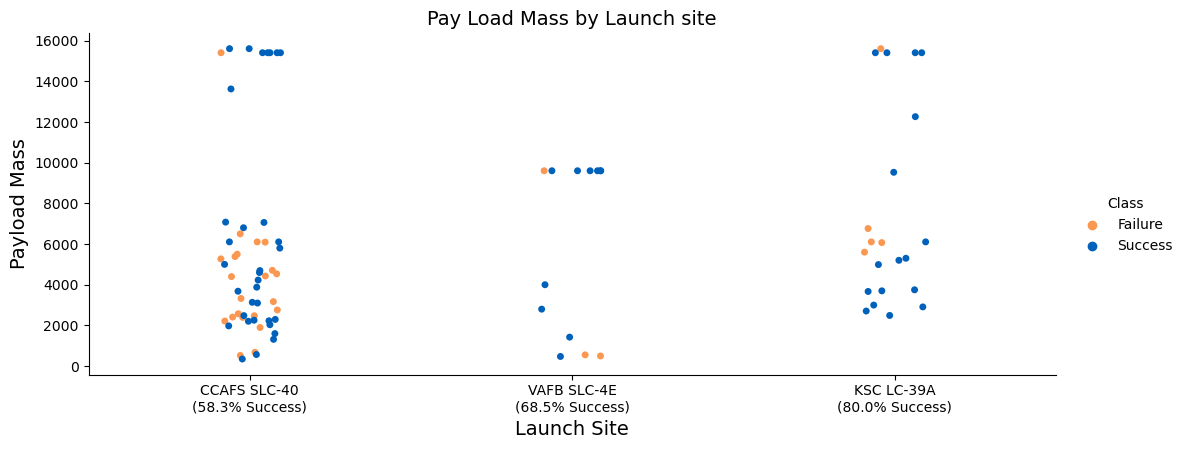

In [11]:
# Visualize the relationship between Flight Number and Launch Site
g = sns.catplot(y="PayloadMass", x="LaunchSite", hue="Class", data=df_mapped, aspect=2, palette=custom_palette)
g.fig.set_size_inches(12, 4)

# Set the labels
plt.ylabel("Payload Mass", fontsize=14)
plt.xlabel("Launch Site", fontsize=14)

# Customize the x-axis tick labels
new_labels = ['CCAFS SLC-40\n(58.3% Success)', 'VAFB SLC-4E\n(68.5% Success)', 'KSC LC-39A\n(80.0% Success)']
g.set_xticklabels(new_labels)

# Add a title to the plot
plt.title("Pay Load Mass by Launch site", fontsize=14)

plt.show()

Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavy payload mass(greater than 10000).


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


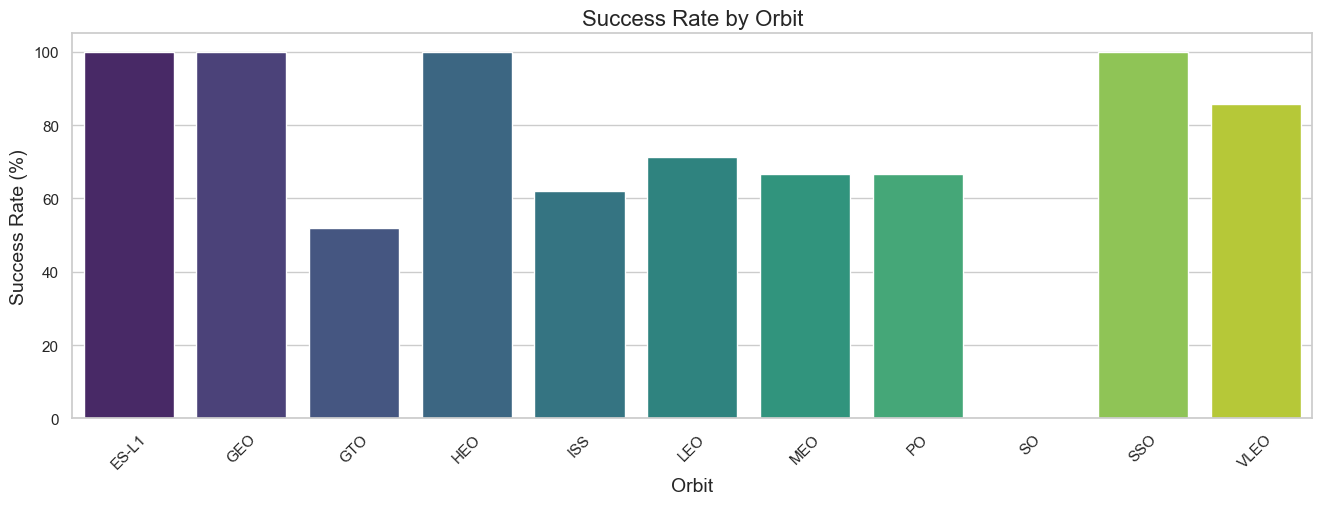

In [19]:
# Assuming df is your original DataFrame
result = df.groupby('Orbit')['Class'].mean() * 100
new_df = result.reset_index()

# Create a barplot using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(16, 5))

# Use sns.barplot to create the barplot
sns.barplot(x="Orbit", y="Class", data=new_df, palette="viridis")

# Set labels and title
plt.xlabel("Orbit", fontsize=14)
plt.ylabel("Success Rate (%)", fontsize=14)
plt.title("Success Rate by Orbit", fontsize=16)

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.show()

For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


c:\Users\Santi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


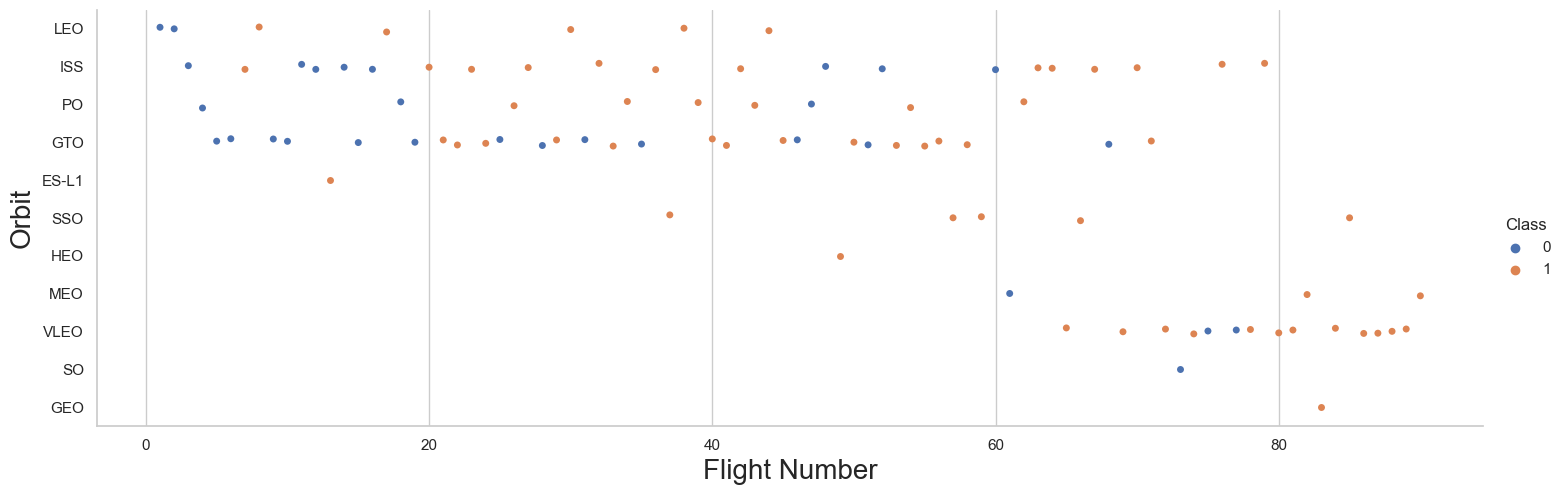

In [43]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value

sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df, aspect = 3)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.

Also we can see that some of the orbits with the highest success rate (100%) have only one flight, except from SSO that accumulates 5 launches with 100% success rate.


c:\Users\Santi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


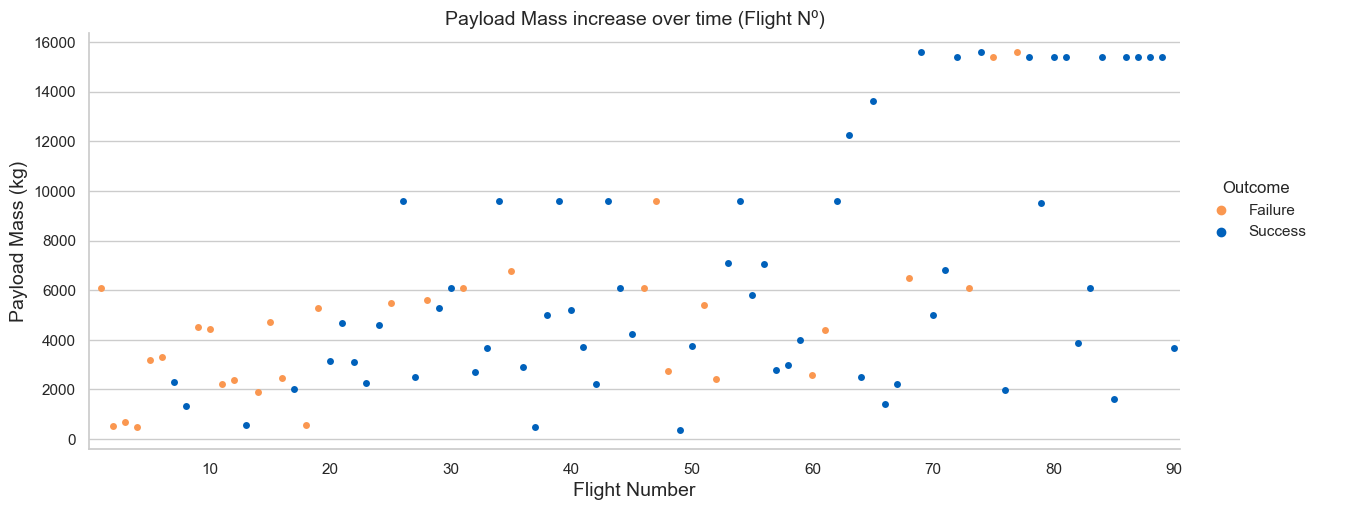

In [20]:
# Create a new DataFrame with the mapped values
df_mapped = df.copy()
df_mapped['Class'] = df_mapped['Class'].map({0: 'Failure', 1: 'Success'})

# Define a custom palette
custom_palette = {'Failure': '#FA9750', 'Success': '#0061BB'}

# Create the catplot with the desired aspect ratio and figure size
g = sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df_mapped, aspect=5, palette=custom_palette)
g.figure.set_size_inches(12, 5)

# Set the labels
g.set_axis_labels("Flight Number", "Payload Mass (kg)", fontsize=14)

# Move the legend away from the plot
g._legend.set_bbox_to_anchor((1.1, 0.6))
g._legend.set_title("Outcome")

# Set the x-axis ticks with a step of 10
plt.xticks(ticks=range(-1, 90, 10))

# Add a title to the plot
plt.title("Payload Mass increase over time (Flight Nº)", fontsize=14)

# Show the plot
plt.show()

Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


c:\Users\Santi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


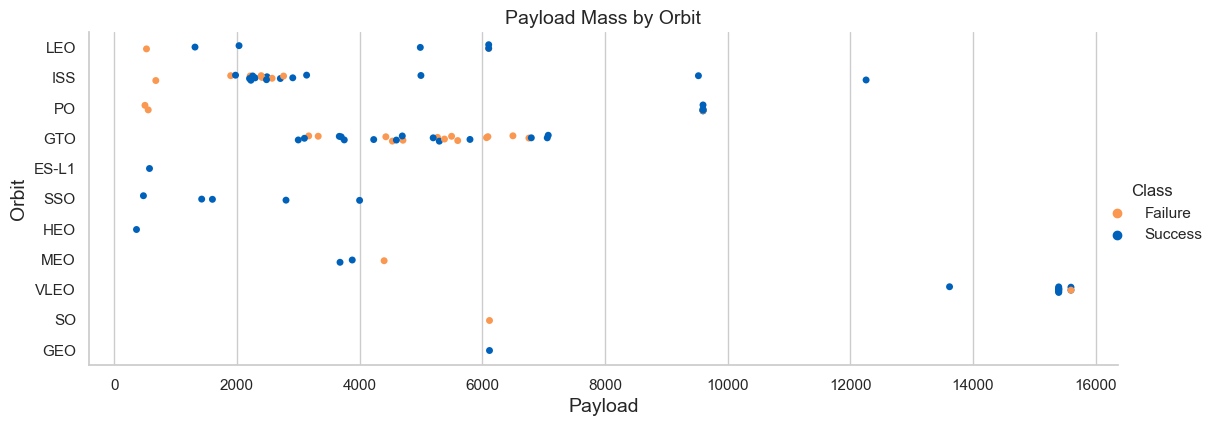

In [142]:
# Create the catplot with the desired aspect ratio and figure size
g = sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=df_mapped, aspect = 3, palette=custom_palette)
g.figure.set_size_inches(12, 4)

# Set the labels
g.set_axis_labels("Payload", "Orbit", fontsize=14)

# Add a title to the plot
plt.title("Payload Mass by Orbit", fontsize=14)

plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


The function will help you get the year from the date:


you can observe that the sucess rate since 2013 kept increasing till 2020


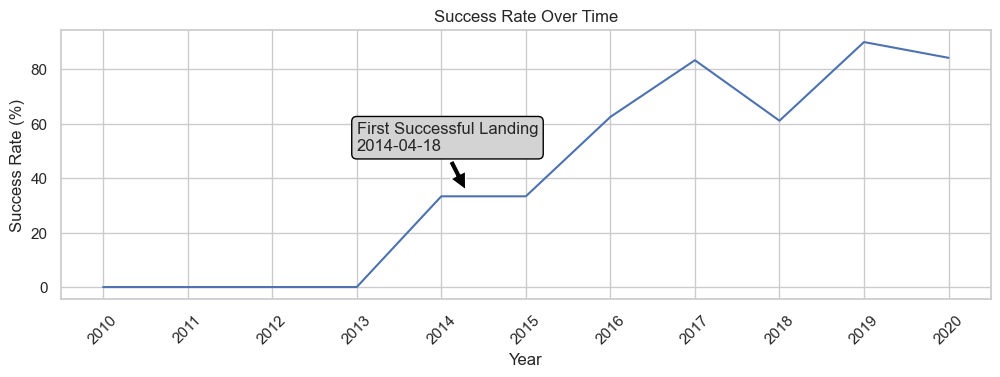

In [72]:
# Assuming df is your original DataFrame
df['Year'] = pd.to_datetime(df['Date']).dt.year

# Group by the 'Year' column and calculate the mean of the 'Class' column
result = df.groupby('Year')['Class'].mean().reset_index()

# Convert the mean class to percentage
result['SuccessRate'] = result['Class'] * 100

# Adding the year 2011 with a success rate of 0%
new_row = pd.DataFrame({'Year': [2011], 'SuccessRate': [0]})
result = pd.concat([result, new_row], ignore_index=True)

# Sorting the dataframe to ensure the year 2011 is in the correct order
result = result.sort_values('Year')

# Re-plotting with the updated data
sns.set(style="whitegrid")
plt.figure(figsize=(12, 3.5))

# Use sns.lineplot to create the line chart
sns.lineplot(x="Year", y="SuccessRate", data=result)

# Set labels and title
plt.xlabel("Year")
plt.ylabel("Success Rate (%)")
plt.title("Success Rate Over Time")

# Set x-axis ticks to show all years
plt.xticks(result['Year'], rotation=45)

# Adding the annotation box
first_successful_date = '2014-04-18'
plt.annotate('First Successful Landing\n2014-04-18', xy=(2014.3, 35), xytext=(2013, 50),
             arrowprops=dict(facecolor='black', shrink=0.05),
             bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='lightgrey'))

# Show the plot
plt.show()


In [69]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [34]:
# HINT: Use get_dummies() function on the categorical columns
# List of columns to one-hot encode
columns_to_encode = ["Orbit", "LaunchSite", "LandingPad", "Serial"]

# Apply one-hot encoding using get_dummies
features_one_hot = pd.get_dummies(features, columns=columns_to_encode)

# Display the resulting DataFrame with encoded features
print(features_one_hot.head())

   FlightNumber  PayloadMass  Flights  GridFins  Reused   Legs  Block  \
0             1  6104.959412        1     False   False  False    1.0   
1             2   525.000000        1     False   False  False    1.0   
2             3   677.000000        1     False   False  False    1.0   
3             4   500.000000        1     False   False  False    1.0   
4             5  3170.000000        1     False   False  False    1.0   

   ReusedCount  Orbit_ES-L1  Orbit_GEO  ...  Serial_B1048  Serial_B1049  \
0            0            0          0  ...             0             0   
1            0            0          0  ...             0             0   
2            0            0          0  ...             0             0   
3            0            0          0  ...             0             0   
4            0            0          0  ...             0             0   

   Serial_B1050  Serial_B1051  Serial_B1054  Serial_B1056  Serial_B1058  \
0             0             0      

In [36]:
### TASK  8: Cast all numeric columns to `float64`
features_one_hot.shape

(90, 80)

Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [35]:
# HINT: use astype function
features_one_hot = features_one_hot.astype('float64')

We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


<code>features_one_hot.to_csv('dataset_part\_3.csv', index=False)</code>


## Authors


[Santiago Semensi](www.linkedin.com/in/santiago-semensi-513842228) Has a Bachelor's degree in Industrial Design, student of the IBM Data Science Professional Certificate program.

[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2022-01-01)


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2024-02-24        | 1.1     | Santiago Semensi    | Completed the notebook, fulfilling and surpassing the course requirements |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
